<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


*   Visualize the distribution of data.

*   Visualize the relationship between two features.

*   Visualize composition of data.

*   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2022-09-21 16:25:11--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite.1’

m4_survey_data.sqli 100%[===================>]  34.98M  22.2MB/s    in 1.6s    

2022-09-21 16:25:14 (22.2 MB/s) - ‘m4_survey_data.sqlite.1’ saved [36679680/36679680]



Connect to the database.


In [2]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Demo: How to run an sql query


In [4]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df

,COUNT(*)
0,11398


## Demo: How to list all tables


In [5]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)

,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [6]:
QUERY = """
SELECT Age, COUNT(*) AS Count
FROM master
GROUP by age
ORDER by age
"""
pd.read_sql_query(QUERY,conn).head()

,Age,Count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78


## Demo: How to describe a table


In [7]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


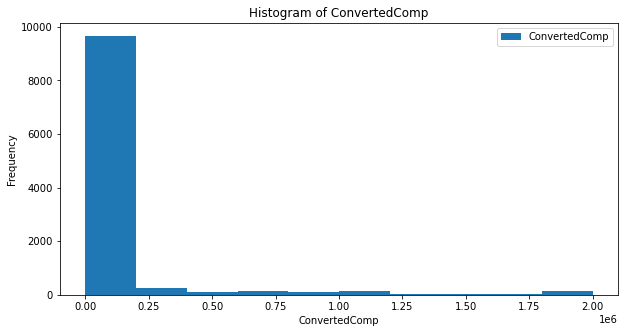

In [8]:
QUERY = """
SELECT ConvertedComp
FROM master

"""

ConvertedComp = pd.read_sql_query(QUERY,conn)

ConvertedComp.plot(kind = 'hist', figsize = (10,5))

plt.title('Histogram of ConvertedComp')
plt.xlabel('ConvertedComp')

plt.show()

### Box Plots


Plot a box plot of `Age.`


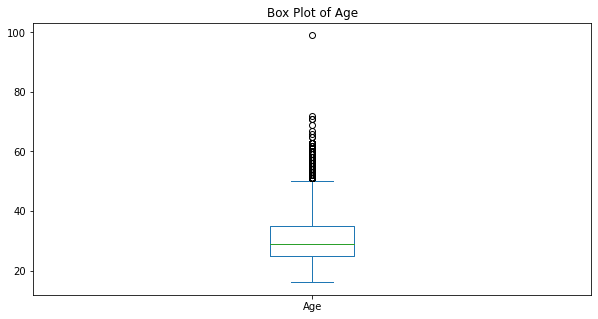

In [9]:
QUERY = """
SELECT Age
FROM master

"""

Age = pd.read_sql_query(QUERY,conn)

Age.plot(kind = 'box', figsize = (10,5))

plt.title('Box Plot of Age')

plt.show()


## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


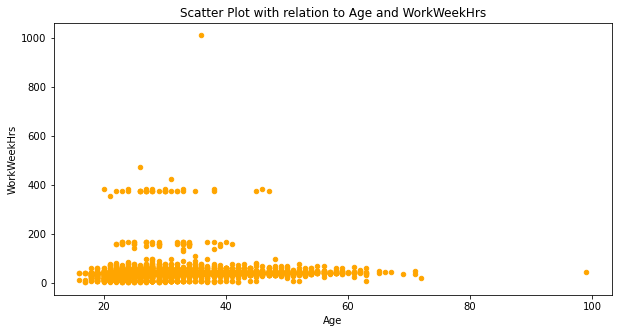

In [10]:
QUERY = """
SELECT Age, WorkWeekHrs
FROM master

"""

scatter = pd.read_sql_query(QUERY,conn)

scatter.plot(kind = 'scatter', x = 'Age', y = 'WorkWeekHrs', figsize = (10,5), color = 'orange')

plt.title('Scatter Plot with relation to Age and WorkWeekHrs')

#sns.scatterplot(data = scatter, x = 'Age', y = 'WorkWeekHrs')

plt.show()

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


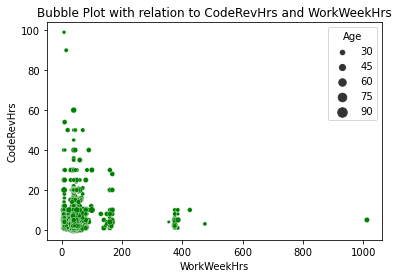

In [11]:
QUERY = """
SELECT Age, WorkWeekHrs, CodeRevHrs
FROM master

"""

Bubble_Plot = pd.read_sql_query(QUERY,conn)

sns.scatterplot(data=Bubble_Plot, x="WorkWeekHrs", y="CodeRevHrs", size="Age", legend = True, sizes=(5, 100), color = 'green')

plt.title('Bubble Plot with relation to CodeRevHrs and WorkWeekHrs')

plt.show()


## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


In [12]:
QUERY = """
SELECT DatabaseDesireNextYear, Count(*) AS COUNT
FROM DatabaseDesireNextYear
GROUP by DatabaseDesireNextYear
ORDER by COUNT DESC LIMIT 5

"""

pie_chart = pd.read_sql_query(QUERY,conn)
pie_chart


,DatabaseDesireNextYear,COUNT
0,PostgreSQL,4328
1,MongoDB,3649
2,Redis,3331
3,MySQL,3281
4,Elasticsearch,2856


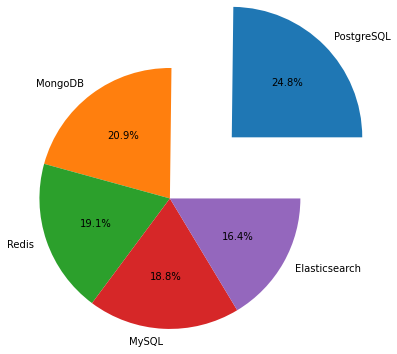

In [13]:
count = pie_chart['COUNT']

label = pie_chart['DatabaseDesireNextYear']

explode = (1,0,0,0,0)

plt.pie(count, labels = label, autopct = '%1.1f%%',radius = 1.5, explode = explode)


plt.show()

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


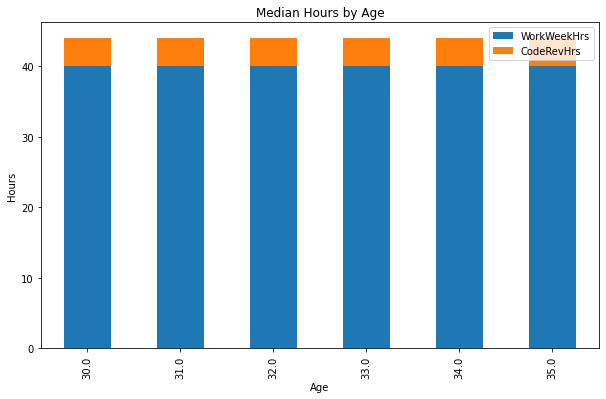

In [14]:
QUERY = """
SELECT WorkWeekHrs, CodeRevHrs, Age
FROM master
WHERE Age <= 35 AND Age >= 30
Order by Age
"""
df = pd.read_sql_query(QUERY,conn) 

df_age = df.groupby('Age', axis=0).median()

df_age[30:35].plot(kind='bar', figsize=(10, 6), stacked=True)

plt.xlabel('Age') # add to x-label to the plot
plt.ylabel('Hours') # add y-label to the plot
plt.title('Median Hours by Age') # add title to the plot

plt.show()

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


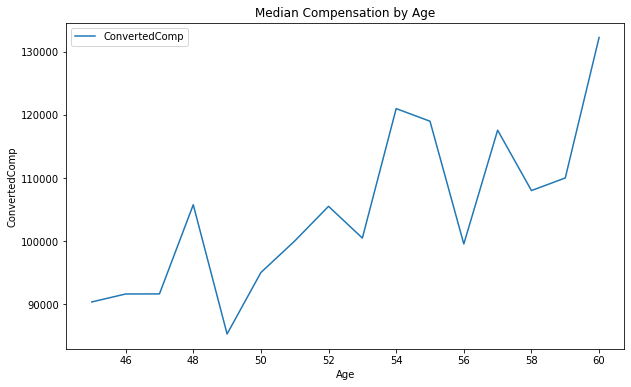

In [15]:
QUERY = """
SELECT ConvertedComp, Age
FROM master
"""

df_comp = pd.read_sql_query(QUERY,conn) 

df_comp = df_comp.groupby('Age', axis=0).median()

df_comp[45:60].plot(kind='line', figsize=(10, 6))

plt.xlabel('Age') # add to x-label to the plot
plt.ylabel('ConvertedComp') # add y-label to the plot
plt.title('Median Compensation by Age') # add title to the plot

plt.show()


### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


,MainBranch,COUNT
0,I am a developer by profession,10618
1,"I am not primarily a developer, but I write co...",780


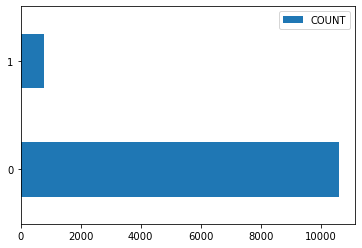

In [16]:
Query = """

SELECT MainBranch, Count(*) AS COUNT
FROM master
GROUP by MainBranch

"""

Main_Branch=pd.read_sql_query(Query, conn)
Main_Branch.plot(kind='barh')
Main_Branch


Close the database connection.


In [17]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
